# Pr7-1: フィルタ入門

画像の周辺をみながらぼかす（平均化する）例で，
1. for文ループによるフィルタ処理
2. フィルタカーネルによるフィルタ処理
3. OpenCV関数によるフィルタ処理

の方法を確認します．

## 入力画像の準備

※ 自分の好きな画像を読み込んでください．

フィルタ処理は大きな画像で計算すると少し重く，またフィルタの効果も見えにくくなるので縮小しておきます．<br>


- image_size: (1266, 585, 3)


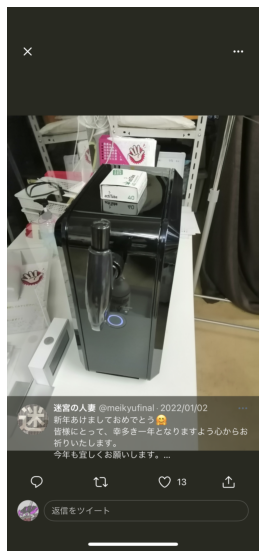

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

image_file = "basaki.PNG"

# 画像ファイルの読み込み．
I_bgr = cv2.imread(image_file)

# フィルタの効果を見やすくするために縮小
scale = 0.5
I_bgr = cv2.resize(I_bgr, None, fx=scale, fy=scale)

# BGR⇒RGBの色変更
I_ori = cv2.cvtColor(I_bgr, cv2.COLOR_BGR2RGB)

# [0, 255]を[0, 1]の小数値に変換
I_ori = np.float32(I_ori)/255.0

# 画像サイズの出力
print("- image_size: {0}".format(I_ori.shape))

# 表示・出力処理
fig = plt.figure(figsize=(10,10))

plt.imshow(I_ori)
plt.axis('off');

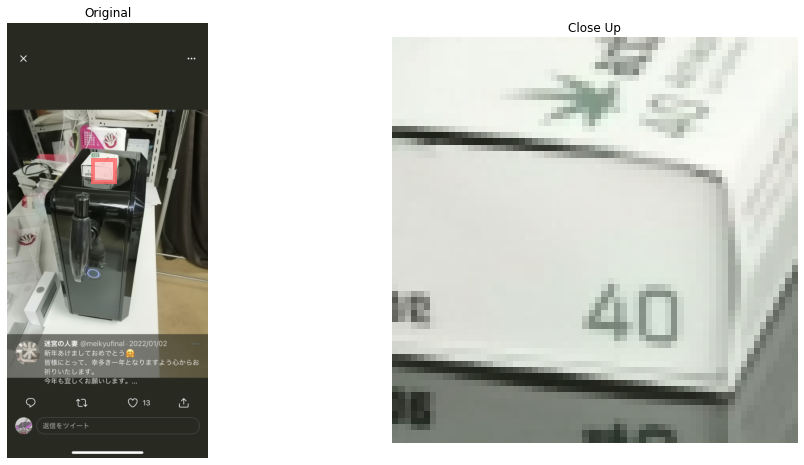

In [2]:
#@title 注目領域の抽出 { run: "auto" }
x = 250 #@param {type:"slider", min:0, max:200, step:1}
y = 400 #@param {type:"slider", min:0, max:200, step:1}
ps = 64 #@param {type:"slider", min:32, max:128, step:1}

I = I_ori[y:y+ps, x:x+ps, :]

# 表示・出力処理
fig = plt.figure(figsize=(16,8))

ax = plt.subplot(1, 2, 1)
plt.imshow(I_ori)
ax.add_patch(patches.Rectangle(xy=(x, y), width=ps, height=ps, 
                               lw=4, ec=[1.0, 0.4, 0.4], fc=[1.0, 0.8, 0.8],
                               alpha=0.8))
plt.axis('off')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(I)
plt.axis('off')
plt.title("Close Up");

## 1. for文ループによるフィルタ処理

周辺の色を参照して平均を取ります．

- F[y, x, :]: 更新したい出力画像の色 
- I[yy, xx, :]: (x, y)の周辺の入力画像にアクセス

平均を取る操作は，
1. F[y, x, :]に周辺の各I[yy, xx, :]を足し込む
2. 周辺部分をアクセスした面積でF[y, x, :]の値を割る

で実現できます．

以下のコードを入れて，ぼかし処理を実行してみましょう．

```
# Work: 周辺ピクセルを参照したときの処理
# - 周辺の色の足し込みと面積をカウント
F[y, x, :] += I[yy, xx, :]
area += 1.0
```

```
# Work: 足し込んだ出力を面積で割る
F[y, x, :] /= area
```



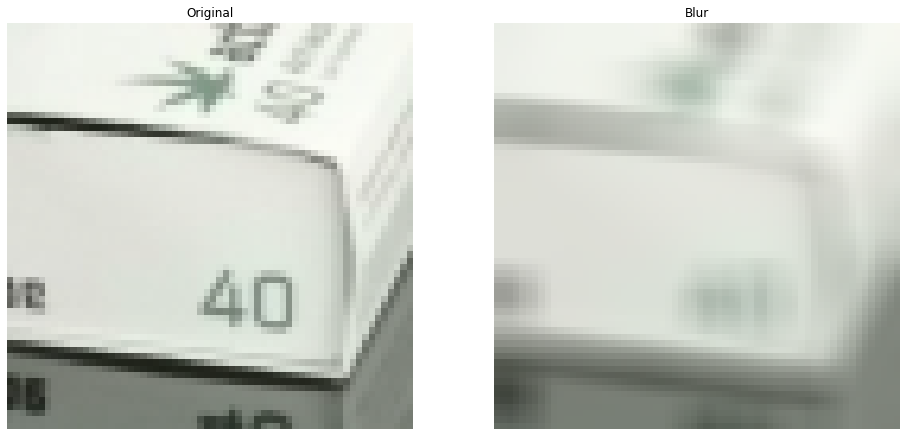

In [3]:
# 空の画像を作成
F = np.zeros_like(I)

# 画像の幅と高さの取り出し
h, w = I.shape[:2]

k = 3

for y in range(h):
    for x in range(w):
        area = 0

        for dy in range(-k, k+1):
            yy = y + dy

            # 画像の範囲外をスキップ
            if yy < 0 or yy >= h:
                continue

            for dx in range(-k, k+1):
                xx = x + dx
                # 画像の範囲外をスキップ
                if xx < 0 or xx >= w:
                    continue

                # Work: 周辺ピクセルを参照したときの処理
                F[y, x, :] += I[yy, xx, :]
                area += 1.0

        
        # Work: 足し込んだ出力を面積で割る
        F[y, x, :] /= area


# 表示・出力処理
fig = plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.imshow(I)
plt.axis('off')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(F)
plt.axis('off')
plt.title("Blur");

## 2.フィルタカーネルによる指定

OpenCVでは，フィルタカーネルを指定して，ぼかし処理を行うことができます．

```
# フィルタ処理の実行
# - 指定したhのカーネルでフィルタがかかる
ddepth = -1
F = cv2.filter2D(I, ddepth, h)
```

フィルタカーネルの例:

```
# 3x3のぼかし処理を行うフィルタカーネル
h = np.array([[1/9, 1/9, 1/9],
              [1/9, 1/9, 1/9],
              [1/9, 1/9, 1/9]])
```


```
# 5x5のぼかしカーネルをプログラムで作る
h = np.ones((5, 5)) / 25.0
```

- ループ処理とフィルタカーネルはどう対応している？


h:  [[0 0 0]
 [0 1 0]
 [0 0 0]]


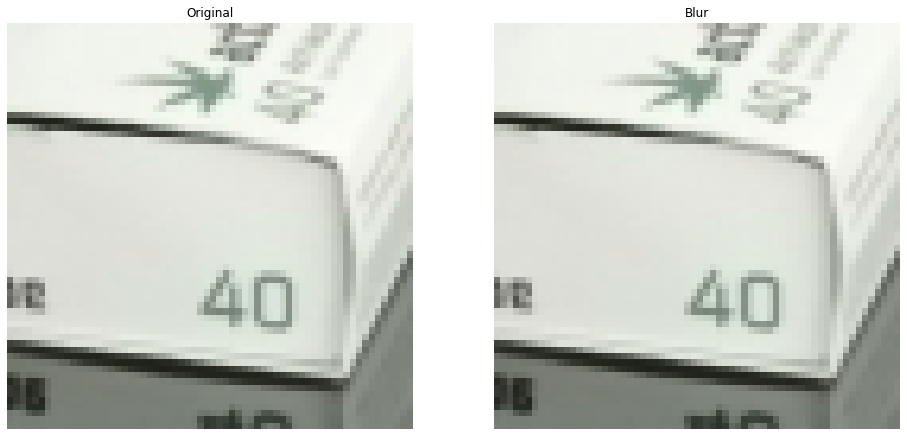

In [4]:
# Work: フィルタカーネルを変更
h = np.array([[0, 0, 0],
              [0, 1, 0],
              [0, 0, 0]])

print("h: ", h)

# フィルタ処理の実行
ddepth = -1
F = cv2.filter2D(I, ddepth, h)

# Fの値を[0, 1]に丸める処理
F = np.clip(F, 0.0, 1.0)

# 表示・出力処理
fig = plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.imshow(I)
plt.axis('off')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(F)
plt.axis('off')
plt.title("Blur");

## OpenCV関数によるフィルタ処理

OpenCVには，平均化フィルタを行うためのcv2.blur関数が用意されています．

```py
F = cv2.blur(I, (ksize, ksize))
```

フィルタカーネルとOpenCV関数の使い分けはどうなるでしょうか？

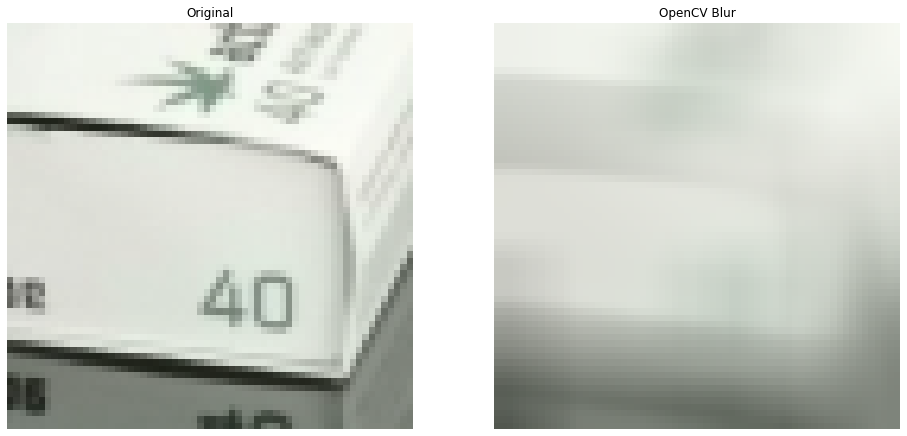

In [5]:
# Work: 値を色々調整してみましょう．
ksize = 15

F = cv2.blur(I, (ksize, ksize))

# 表示・出力処理
fig = plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.imshow(I)
plt.axis('off')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(F)
plt.axis('off')
plt.title("OpenCV Blur");